## CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phaseData Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model

In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.

## Let us import all the necessary libraries

In [596]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [594]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## The Data:
#### Let us import the dataset which we have scraped from multiple sources

In [524]:
df = pd.read_csv('car_details.csv')
df

,Brand,Model,Variant,Year of Manufacture,Driven Kilometers,Fuel type,Transmission Type,Number of Owners,Location,Price in Lakhs
0,Maruti,Suzuki,VDI,2007,80000.0,DIESEL,MANUAL,1st,Karnataka,"2,85,000"
1,Maruti,Suzuki,LXI Optional-O,2017,90000,CNG,MANUAL,Second,Rajasthan,"4,20,000"
2,Hyundai,Creta,1.6 SX Plus Auto,2017,33000.0,PETROL,AUTOMATIC,1st,Maharashtra,"10,85,000"
3,Honda,City,V CVT Petrol [2017-2019],Jan 2017,"24,546",Petrol,Automatic,First,Noida,8.04
4,Tata,Nano,2012-2015 Twist XE,2015,"26,000",PETROL,MANUAL,2nd,Kerala,"2,00,000"
...,...,...,...,...,...,...,...,...,...,...
3190,Toyota,Fortuner,4x2 AT,Jun 2013,"58,000",Diesel,Automatic,First,Noida,14.75
3191,Ford,Ecosport,Titanium 1.5 TDCi,Jan 2015,"46,053",Diesel,Manual,First,Noida,5.28
3192,Maruti,Suzuki,LXI,2011,82000.0,PETROL,MANUAL,1st,Maharashtra,"1,75,000"
3193,Maruti,Suzuki,LXI,2003,140000,PETROL,MANUAL,Fourth,Kerala,"56,000"


### We have scraped the details of 3000+ cars. The dataset coonsist of 3195 rows and 10 columns. All these attributes will be useful to predict the Price of car.

In [525]:
#checking the statistics of the dataset
df.describe()

,Brand,Model,Variant,Year of Manufacture,Driven Kilometers,Fuel type,Transmission Type,Number of Owners,Location,Price in Lakhs
count,3195,3195,3071,3195,3195,3195,3195,3195,3195,3195
unique,46,243,1456,111,1083,11,5,11,7,791
top,Maruti,Suzuki,VXI,2014,90000,DIESEL,MANUAL,1st,Tamil,"4,50,000"
freq,886,886,99,259,56,1461,2261,1456,500,47


In [526]:
#Let us check the statistics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brand                3195 non-null   object
 1   Model                3195 non-null   object
 2   Variant              3071 non-null   object
 3   Year of Manufacture  3195 non-null   object
 4   Driven Kilometers    3195 non-null   object
 5   Fuel type            3195 non-null   object
 6   Transmission Type    3195 non-null   object
 7   Number of Owners     3195 non-null   object
 8   Location             3195 non-null   object
 9   Price in Lakhs       3195 non-null   object
dtypes: object(10)
memory usage: 249.7+ KB


### We see that there are some null values in the variant attribute. Due to presence of unformatted values the data is in catagorical format. We will look into each attribute and see how can we make the data in one format.

Let us check the column names.

In [527]:
df.columns

Index(['Brand', 'Model', 'Variant', 'Year of Manufacture', 'Driven Kilometers',
       'Fuel type', 'Transmission Type', 'Number of Owners', 'Location',
       'Price in Lakhs'],
      dtype='object')

In [528]:
#Let us check if any null values present in the data
df.isnull().sum()

Brand                    0
Model                    0
Variant                124
Year of Manufacture      0
Driven Kilometers        0
Fuel type                0
Transmission Type        0
Number of Owners         0
Location                 0
Price in Lakhs           0
dtype: int64

## Exploratory Data Analysis

Let us analyse the data how can we extract some good information about the customer behavior based on available user data. Let us blend the data as per our requirement for the analysis using different tricks and techniques solving the problem statememt at the end.

Let us check the unique values of each attribute

In [529]:
df['Brand'].value_counts()

Maruti              886
Hyundai             520
Mahindra            258
Toyota              216
Honda               212
Tata                139
Ford                116
Volkswagen          108
Mercedes-Benz        89
Renault              79
Skoda                79
Audi                 69
Chevrolet            68
Maruti Suzuki        67
Bmw                  56
Nissan               25
Fiat                 21
BMW                  18
Kia                  17
Land                 17
Porsche              16
Jaguar               16
Other                11
Volvo                10
Mitsubishi            9
Mercedes              8
Jeep                  8
Mg                    7
Datsun                7
Bajaj                 6
Ashok                 6
Lamborghini           4
MG                    4
Force                 4
Land Rover            3
Bentley               2
Mini                  2
Premier               2
Ambassador            2
Mahindra-Renault      2
Daewoo                1
Eicher          

There are some brand names of same company but mentioned in different way, we should replace with common names

In [530]:
df['Model'].value_counts()

Suzuki     886
Innova     104
City       100
I20         83
I10         81
          ... 
Xuv300       1
Ingenio      1
DZire        1
Passat       1
Teana        1
Name: Model, Length: 243, dtype: int64

In [531]:
df['Year of Manufacture'].unique()

array(['2007', '2017', 'Jan 2017', '2015', '2020', '2009', '2010', '2019',
       '2014', '2013', '2016', '2012', '2018', 'Jun 2012', 'Jun 2017',
       '2003', 'Jun 2015', '2011', '2021', '2005', 'Jul 2015', '2008',
       'Jun 2018', '2009.0', 'Jun 2016', 'Jun 2014', 'Jun 2020', '1999',
       '2006', '1997', '2004', 'Oct 2017', 'May 2012', '2002', 'Nov 2012',
       'Jun 2019', '1991', 'Jul 2010', 'Sep 2014', 'Jan 2014', '1995',
       '1994', 'Jun 2021', '2001', '1987', '1985', 'May 2015', 'Jun 2011',
       'Jun 2009', '2022', 'Jan 2016', 'Dec 2017', 'Jun 2013', '2000',
       'Apr 2015', 'Apr 2019', 'May 2017', '1996', 'Aug 2018', 'Mar 2017',
       'May 2019', 'Sep 2018', 'Oct 2021', 'Nov 2019', 'Oct 2020',
       'Aug 2015', 'Feb 2017', 'Jan 2018', 'Jul 2017', 'Jun 2010',
       'Feb 2015', 'Oct 2014', 'Jan 2019', 'May 2018', '1984', 'Mar 2019',
       'Aug 2013', '1998', 'Dec 2013', 'Jun 2008', 'Mar 2021', 'Feb 2014',
       'Sep 2017', 'Aug 2014', 'Jan 2015', 'Jan 2013', 'Dec

Some values in Year of Manufacture has Year and Month mentioned, some are mentioned just year, We need to pull only year values and convert it into numerical attribue

In [532]:
df['Fuel type'].unique()

array(['DIESEL', 'CNG', 'PETROL', 'Petrol', 'CNG & HYBRIDS', 'Diesel',
       '--', 'LPG', 'ELECTRIC', 'PETROL/LIQUIFIED PETROLEUM GAS',
       'CNG + Cng'], dtype=object)

Again Fuel type has same names but one mentioned in Upper case and other in lower, we will replace duplicates into common names

In [533]:
df['Number of Owners'].unique()

array(['1st', 'Second', 'First', '2nd', 'Third', '3rd', '--', '4th',
       'Fourth', '4+', 'UnRegistered Car'], dtype=object)

Here the values are mentioned in numbers and words, we will replace these by only numbers, and those values above 4 will be replaced by 4 for convenience.

In [534]:
df['Location'].value_counts()

Tamil          500
Kerala         495
Karnataka      490
Maharashtra    489
Rajasthan      489
Delhi          485
Noida          247
Name: Location, dtype: int64

Noida is city name, as we are having only state mentioned, we will replace it into relavant information.

In [535]:
df['Price in Lakhs'].unique()

array([' 2,85,000', ' 4,20,000', ' 10,85,000', '8.04', ' 2,00,000',
       ' 9,15,000', ' 4,60,000', ' 1,30,000', ' 2,20,000', ' 28,50,000',
       ' 13,50,000', ' 10,75,000', ' 2,45,000', ' 4,49,999', ' 3,10,000',
       ' 4,50,000', ' 3,45,000', ' 9,50,000', ' 2,35,000', ' 7,45,000',
       '5.7', ' 2,15,000', '78', ' 3,50,000', ' 43,000', ' 7,50,000',
       ' 12,00,000', ' 4,25,000', '2.5', ' 7,40,000', ' 10,90,000',
       ' 4,30,000', ' 24,50,000', ' 4,80,000', ' 12,25,000', ' 6,40,000',
       ' 49,00,000', ' 2,99,999', ' 5,40,000', ' 2,40,000', ' 1,05,000',
       ' 4,95,000', ' 3,85,000', ' 7,60,000', ' 1,80,000', ' 6,75,000',
       ' 6,50,000', '5.75', ' 2,98,000', ' 1,25,000', ' 5,50,000',
       ' 2,70,000', '26.75', ' 8,90,000', ' 1,40,000', ' 1,10,000',
       ' 4,70,000', ' 1,50,000', ' 8,99,000', ' 1,46,000', ' 3,65,000',
       ' 8,85,000', ' 5,25,000', '4.6', ' 2,25,000', ' 40,00,000',
       ' 10,40,000', ' 6,85,000', '29', ' 4,65,000', ' 13,85,000',
       ' 1,75,0

Price attribute is having ',' and empty spaces in the data scraped, this is what make the task challenging, let us try work on this attribute and make uniform format. And some values less than 100 are to be multiplied by 100000(lakhs).

In [536]:
df['Driven Kilometers'].value_counts()

90000       56
70000       46
120000      45
85000.0     41
60000.0     41
            ..
204703       1
65260.0      1
81,891       1
100365       1
203500.0     1
Name: Driven Kilometers, Length: 1083, dtype: int64

Driven kms have ',' in the data, let us work on removing ',' from each value.

In [537]:
df['Variant'].value_counts()

VXI                                  99
Others                               82
LXI                                  65
VDI                                  63
LXi                                  28
                                     ..
2006-2010 VXI Minor ABS               1
2013-2015 GT TDI                      1
2012-2013 2.5 G (Diesel) 7 Seater     1
5 STR With AC Plus HTR CNG            1
i-VTEC SV                             1
Name: Variant, Length: 1456, dtype: int64

### Let us explore the data by visualizing the attributes and how are the distributed and find out some insights from the visualizations
## Univariate Analysis

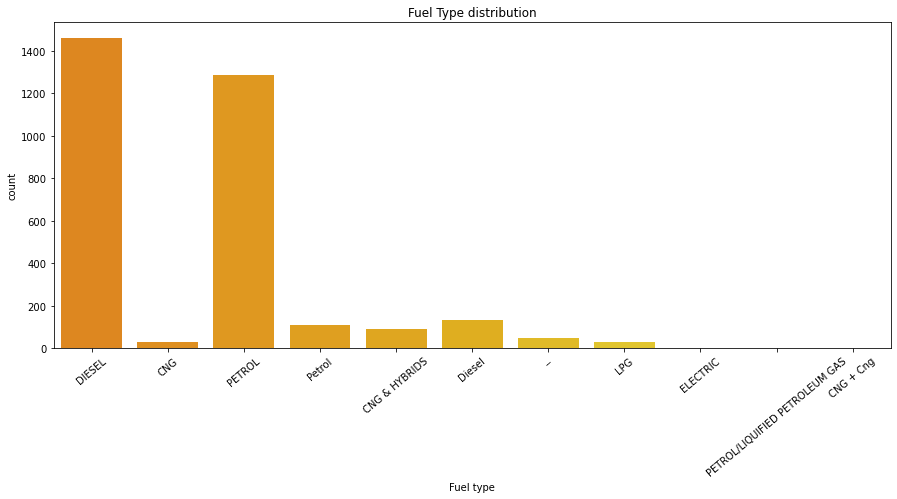

In [538]:
plt.figure(figsize=(15,6), facecolor='white')
sns.countplot(df['Fuel type'], palette= 'Wistia_r')
plt.xticks(rotation=40)
plt.title('Fuel Type distribution')
plt.show()

#### In India, Diesel engines are the most used cars followed by petrol engines.

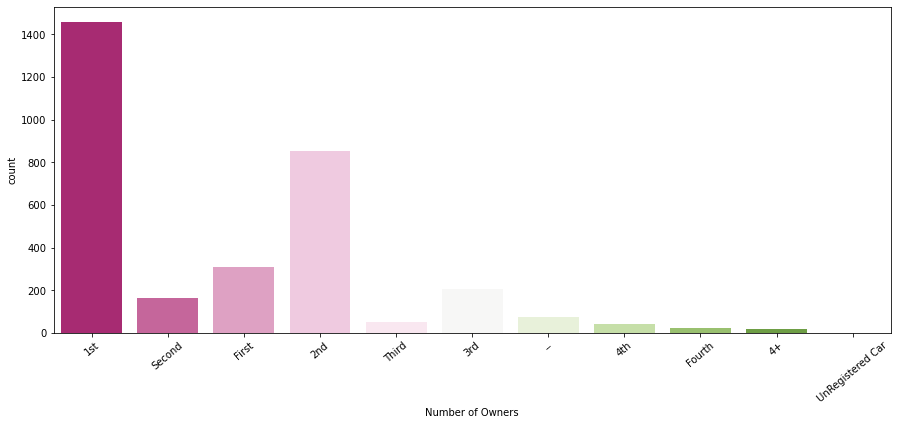

In [539]:
plt.figure(figsize=(15,6), facecolor='white')
sns.countplot(df['Number of Owners'], palette='PiYG')
plt.xticks(rotation=40)
plt.show()

#### Most of the vechiles out for sales are having single owners.

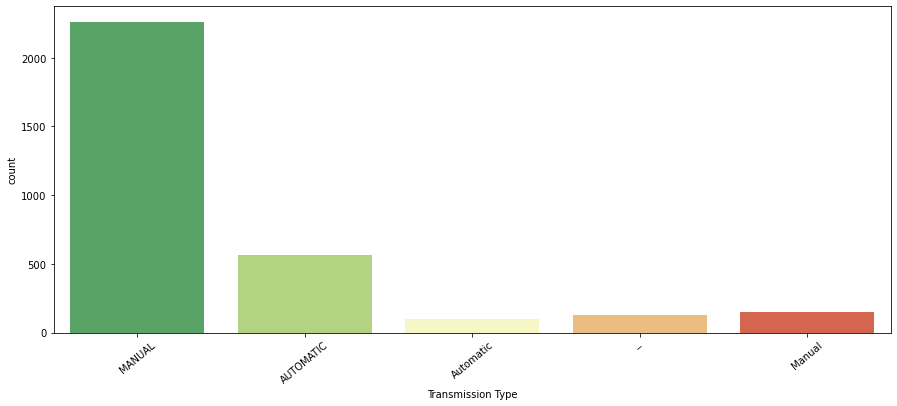

In [540]:
plt.figure(figsize=(15,6), facecolor='white')
sns.countplot(df['Transmission Type'], palette='RdYlGn_r')
plt.xticks(rotation=40)
plt.show()

#### Most of the vehicles choosed by indians are manual type

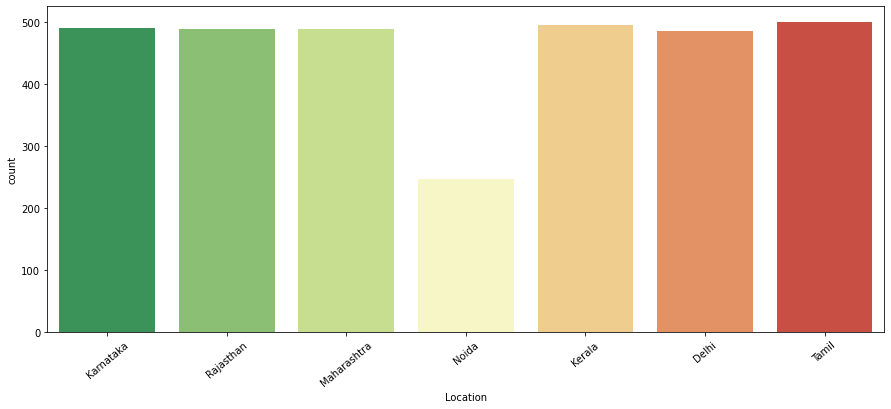

In [541]:
plt.figure(figsize=(15,6), facecolor='white')
sns.countplot(df['Location'],palette='RdYlGn_r')
plt.xticks(rotation=40)

plt.show()

## Data Preprocessing:

## The data we have scraped is unstructured we have to treat each column with logic to make all the data structed and formatted. 

Let us make the brand attribute uniform by replacing a common name into all attributes.

In [542]:
df['Brand'].replace('Maruti', 'Maruti Suzuki',inplace=True)
df['Brand'].replace(['Mercedes','Maybach'],'Mercedes-Benz',inplace=True)
df['Brand'].replace('Mg', 'MG',inplace=True) 

In [543]:
df['Brand'].value_counts()

Maruti Suzuki       953
Hyundai             520
Mahindra            258
Toyota              216
Honda               212
Tata                139
Ford                116
Volkswagen          108
Mercedes-Benz        98
Renault              79
Skoda                79
Audi                 69
Chevrolet            68
Bmw                  56
Nissan               25
Fiat                 21
BMW                  18
Land                 17
Kia                  17
Porsche              16
Jaguar               16
Other                11
MG                   11
Volvo                10
Mitsubishi            9
Jeep                  8
Datsun                7
Bajaj                 6
Ashok                 6
Force                 4
Lamborghini           4
Land Rover            3
Mini                  2
Bentley               2
Premier               2
Mahindra-Renault      2
Ambassador            2
Lexus                 1
MINI                  1
Isuzu                 1
Daewoo                1
Eicher          

In [544]:
# replacing common values in the 'Fuel Type' attribute 
df['Fuel type'].replace('DIESEL','Diesel',inplace=True)
df['Fuel type'].replace('PETROL','Petrol',inplace=True)
df['Fuel type'].replace(['CNG','CNG & HYBRIDS','ELECTRIC','PETROL/LIQUIFIED PETROLEUM GAS','LPG','CNG + Cng'],'Others',inplace=True)
df['Fuel type'].replace('--','Diesel',inplace=True)

df['Fuel type'].replace({'Diesel':1,'Petrol':2,'Others':3},inplace=True)

In [545]:
df['Fuel type'].value_counts()

1    1643
2    1394
3     158
Name: Fuel type, dtype: int64

In [546]:
#replacing the missing values in the attribute with most frequent occuring value
df['Variant'].replace(np.nan, 'VXI', inplace=True)

## Label Encoding

### the categorical attributes are to be converted into numerical values.

In [547]:
#label encoding the Variant,Brand and Model column:

lab_en = LabelEncoder() 
df["Variant"] =  lab_en.fit_transform(df['Variant'])
df['Brand'] = lab_en.fit_transform(df['Brand'])
df['Model'] = lab_en.fit_transform(df['Model'])


#### Let us replace the values addressed in multiple ways into common names

In [548]:

df['Number of Owners'].replace(['1st','First','--'],1, inplace=True)
df['Number of Owners'].replace(['2nd','Second'],2, inplace=True)
df['Number of Owners'].replace(['3rd','Third'],3, inplace=True)
df['Number of Owners'].replace(['4th','Fourth','4+', 'UnRegistered Car'],4, inplace=True)

df['Number of Owners'].value_counts()

1    1840
2    1016
3     254
4      85
Name: Number of Owners, dtype: int64

In [549]:
df['Transmission Type'].replace(['MANUAL','--','Manual'],0, inplace=True)
df['Transmission Type'].replace(['AUTOMATIC','Automatic'],1, inplace=True)
                                
df['Transmission Type'].value_counts()                                

0    2535
1     660
Name: Transmission Type, dtype: int64

In [550]:
df['Location'].replace('Noida', 'Delhi', inplace=True)
df_dum = pd.get_dummies(df['Location'], drop_first=True)
df = df.join(df_dum)

df.drop(['Location'], axis=1,inplace=True)

### Removing the values having empty spaces and making the attribute uniform 

In [551]:
index = []
for i in df['Year of Manufacture']:
    if i[1].isalpha():
        j=i.split(' ')[1]
        df['Year of Manufacture'].replace(i,j, inplace=True)
        

In [552]:
df['Year of Manufacture'].replace('2009.0','2009', inplace=True)
df['Year of Manufacture'] = df['Year of Manufacture'].astype(int)

#calculating the age of vehichle by subtracting the Year of Manufacture from current year.

df['Age of car'] = 2022-df['Year of Manufacture']

#as we have extracted useful information from this attribute let us drop it from dataset
df.drop('Year of Manufacture', inplace=True, axis=1)

In [553]:
df

,Brand,Model,Variant,Driven Kilometers,Fuel type,Transmission Type,Number of Owners,Price in Lakhs,Karnataka,Kerala,Maharashtra,Rajasthan,Tamil,Age of car
0,28,196,1287,80000.0,1,0,1,"2,85,000",1,0,0,0,0,15
1,28,196,1072,90000,3,0,2,"4,20,000",0,0,0,1,0,5
2,15,62,195,33000.0,2,1,1,"10,85,000",0,0,1,0,0,5
3,14,51,1280,"24,546",2,1,1,8.04,0,0,0,0,0,5
4,38,142,587,"26,000",2,0,2,"2,00,000",0,1,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,39,88,758,"58,000",1,1,1,14.75,0,0,0,0,0,9
3191,13,71,1258,"46,053",1,0,1,5.28,0,0,0,0,0,7
3192,28,196,1063,82000.0,2,0,1,"1,75,000",0,0,1,0,0,11
3193,28,196,1063,140000,2,0,4,"56,000",0,1,0,0,0,19


In [554]:
#removing the empty spaces in the "price " attribute and replacing with values

for i in df['Price in Lakhs']:
    if(i[0].isspace):
        j = i.lstrip().replace(',','')
        df['Price in Lakhs'].replace(i,j, inplace=True)

df['Price in Lakhs']=df['Price in Lakhs'].astype(float)
for i in df['Price in Lakhs']:
    if i<100:
        df['Price in Lakhs']=df['Price in Lakhs'].replace(i, i*100000)

# converting the attribute into int data type
df['Price in Lakhs']=df['Price in Lakhs'].astype(int)

In [555]:
for i in df['Driven Kilometers']:
    j = i.replace(',','')
    df['Driven Kilometers'].replace(i, j, inplace=True)
    
df['Driven Kilometers'].replace(['--',0],'90000', inplace=True)
df['Driven Kilometers'] = df['Driven Kilometers'].astype(float)

for i in df['Driven Kilometers']:
    if i < 100:
        df['Driven Kilometers']=df['Driven Kilometers'].replace(i, i*10000)
      
    
df['Driven Kilometers'] = df['Driven Kilometers'].astype(int)

### After treating all the attributes we are having the columns with only numerical data

In [556]:
df.dtypes


Brand                int32
Model                int32
Variant              int32
Driven Kilometers    int32
Fuel type            int64
Transmission Type    int64
Number of Owners     int64
Price in Lakhs       int32
Karnataka            uint8
Kerala               uint8
Maharashtra          uint8
Rajasthan            uint8
Tamil                uint8
Age of car           int32
dtype: object

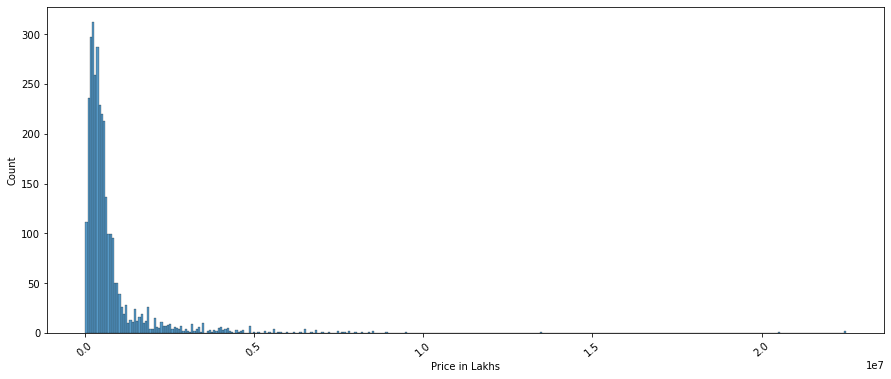

In [557]:
plt.figure(figsize=(15,6), facecolor='white')
sns.histplot(df['Price in Lakhs'])
plt.xticks(rotation=40)
plt.show()

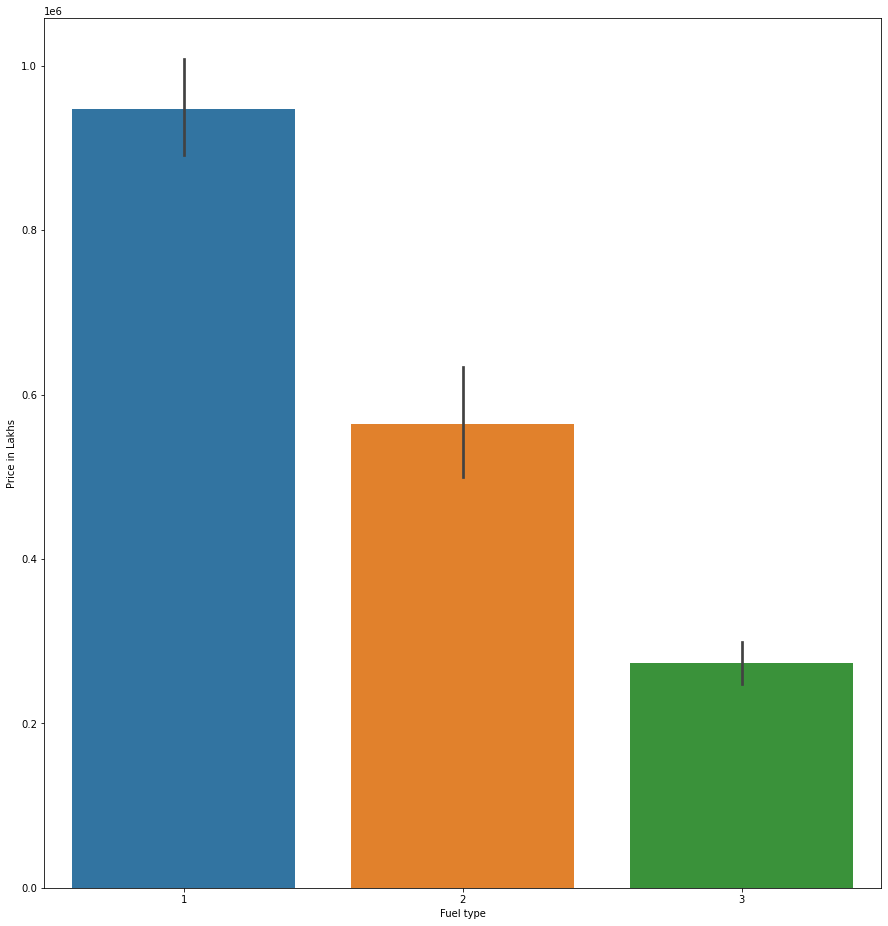

In [558]:
plt.figure(figsize=(15,16), facecolor='white')
sns.barplot(x=df['Fuel type'],y=df['Price in Lakhs'])
plt.show()

1 = Diesel engines which are the highest used category have highest price range
2 = Petrol engines
3 = Other categories(CNG/Electric/Hybrid)

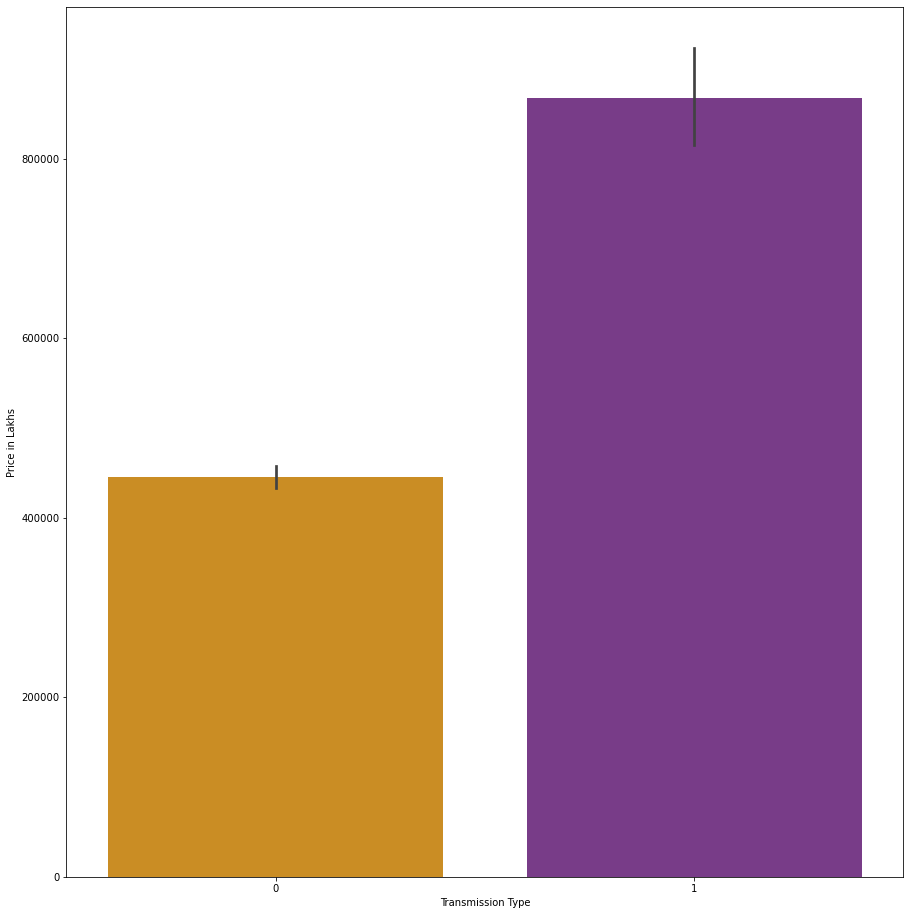

In [630]:
plt.figure(figsize=(15,16), facecolor='white')
sns.barplot(x=df['Transmission Type'],y=df['Price in Lakhs'],palette='CMRmap_r')
plt.show()

### Manual cars are having less reselling values as compared to automatic cars 

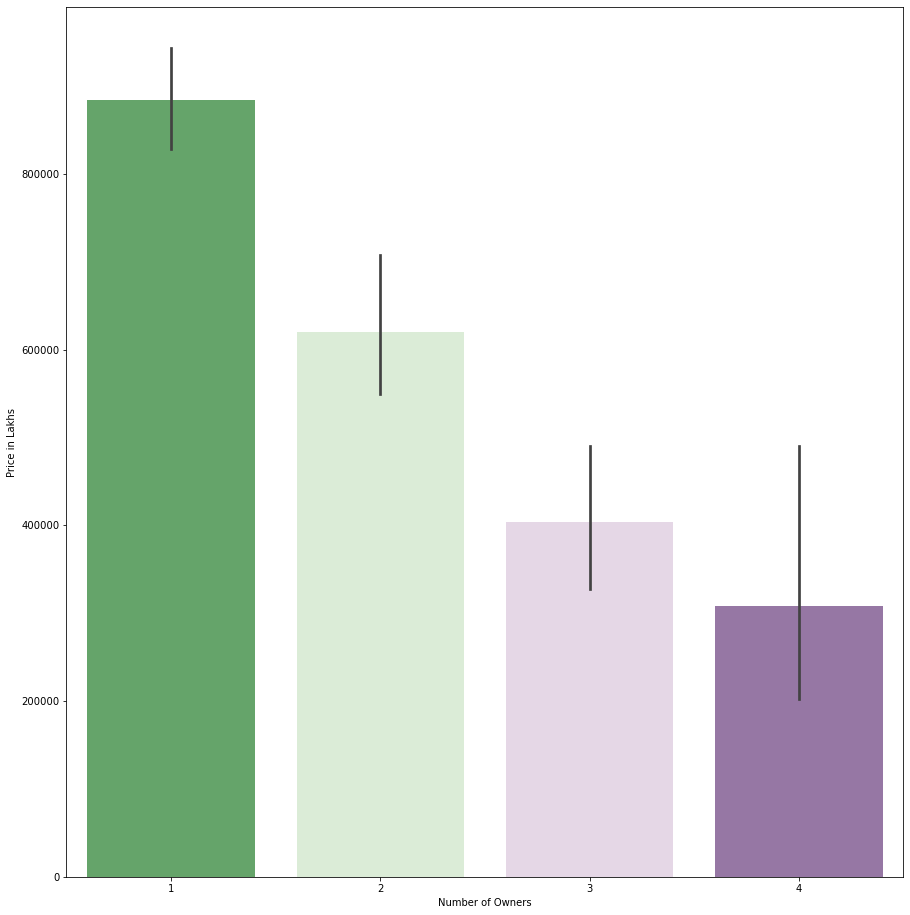

In [560]:
plt.figure(figsize=(15,16), facecolor='white')
sns.barplot(x=df['Number of Owners'],y=df['Price in Lakhs'],palette='PRGn_r')
plt.show()

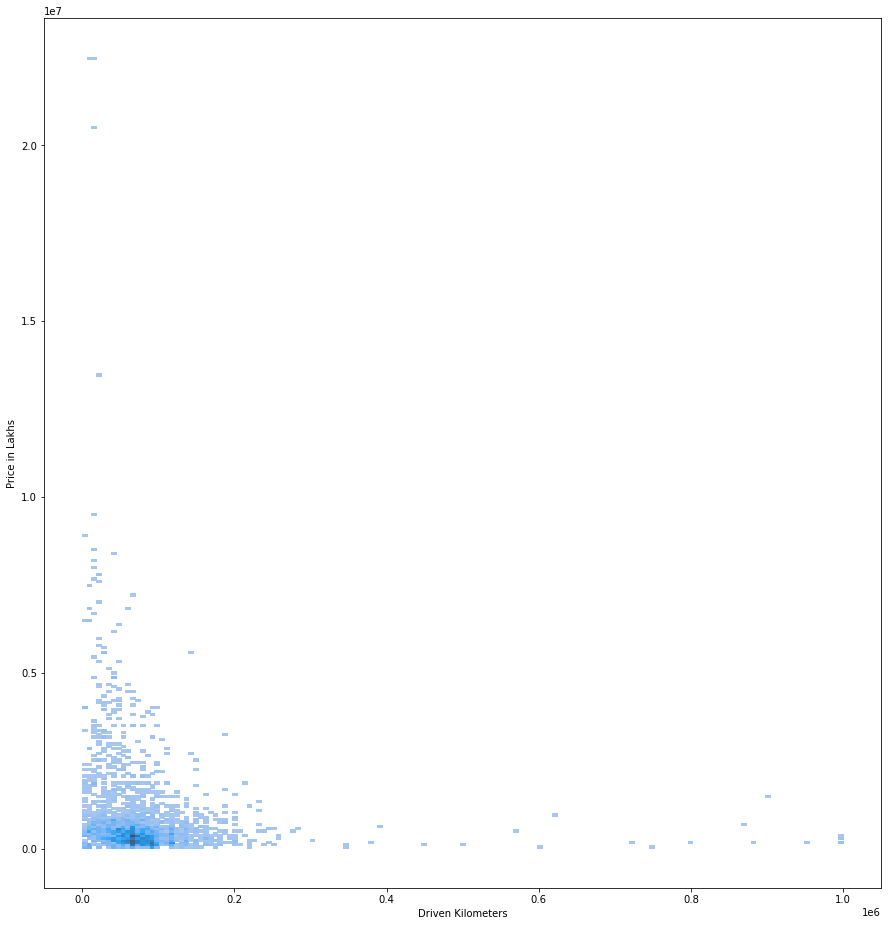

In [561]:
plt.figure(figsize=(15,16), facecolor='white')
sns.histplot(x=df['Driven Kilometers'],y=df['Price in Lakhs'],palette='PuOr_r')
plt.show()

### As we are seeing the prices of used cars, The highest driven cars have comparitively low price range.

<Figure size 1080x1152 with 0 Axes>

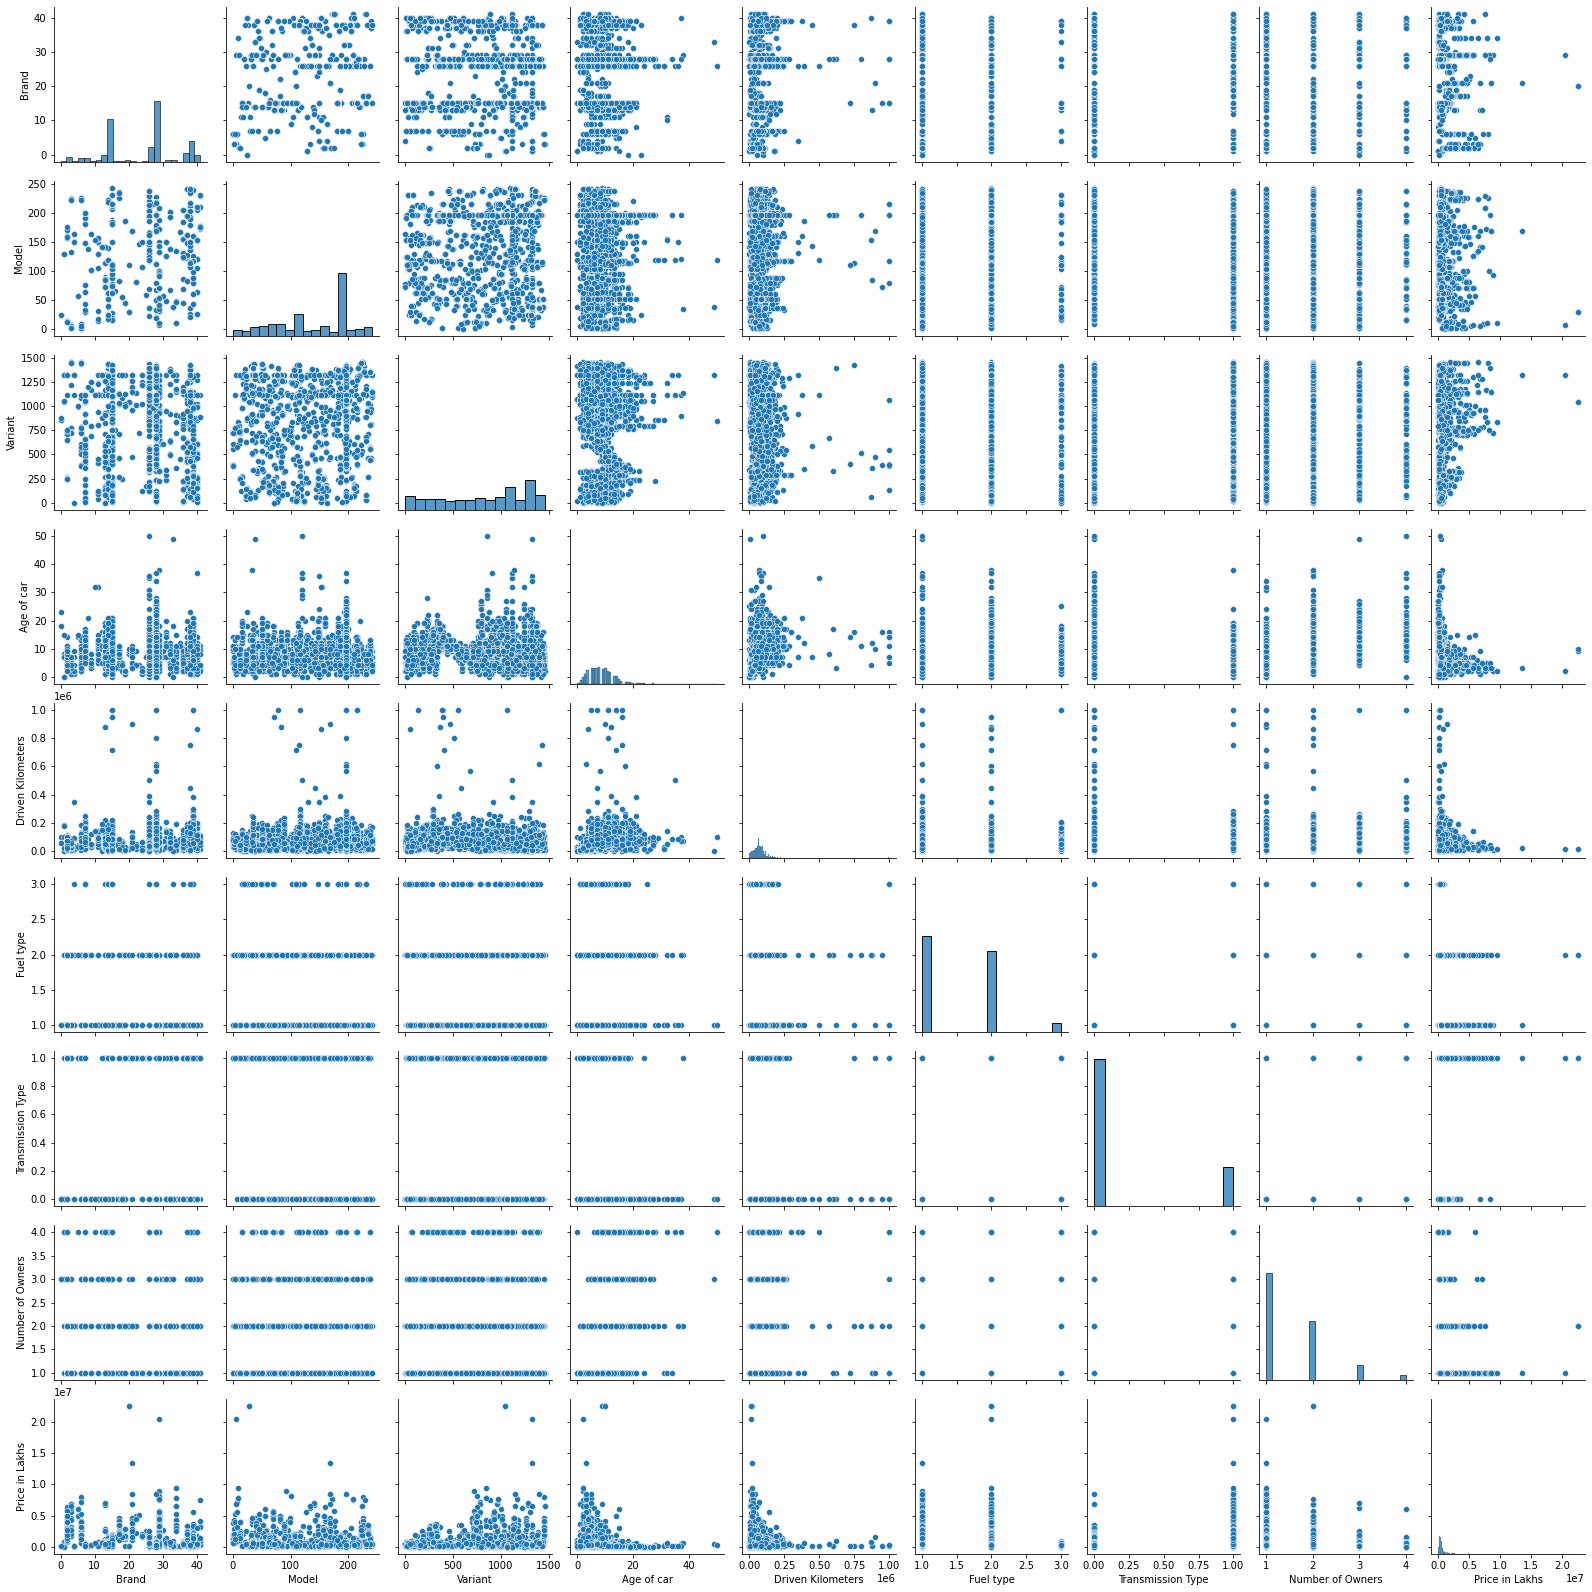

In [564]:
col = ['Brand', 'Model', 'Variant', 'Age of car', 'Driven Kilometers','Fuel type', 'Transmission Type', 'Number of Owners', 'Price in Lakhs',] 
plt.figure(figsize=(15,16), facecolor='white')
sns.pairplot(df[col],palette='RdYlGn_r')
plt.show()

## Checking the Outliers

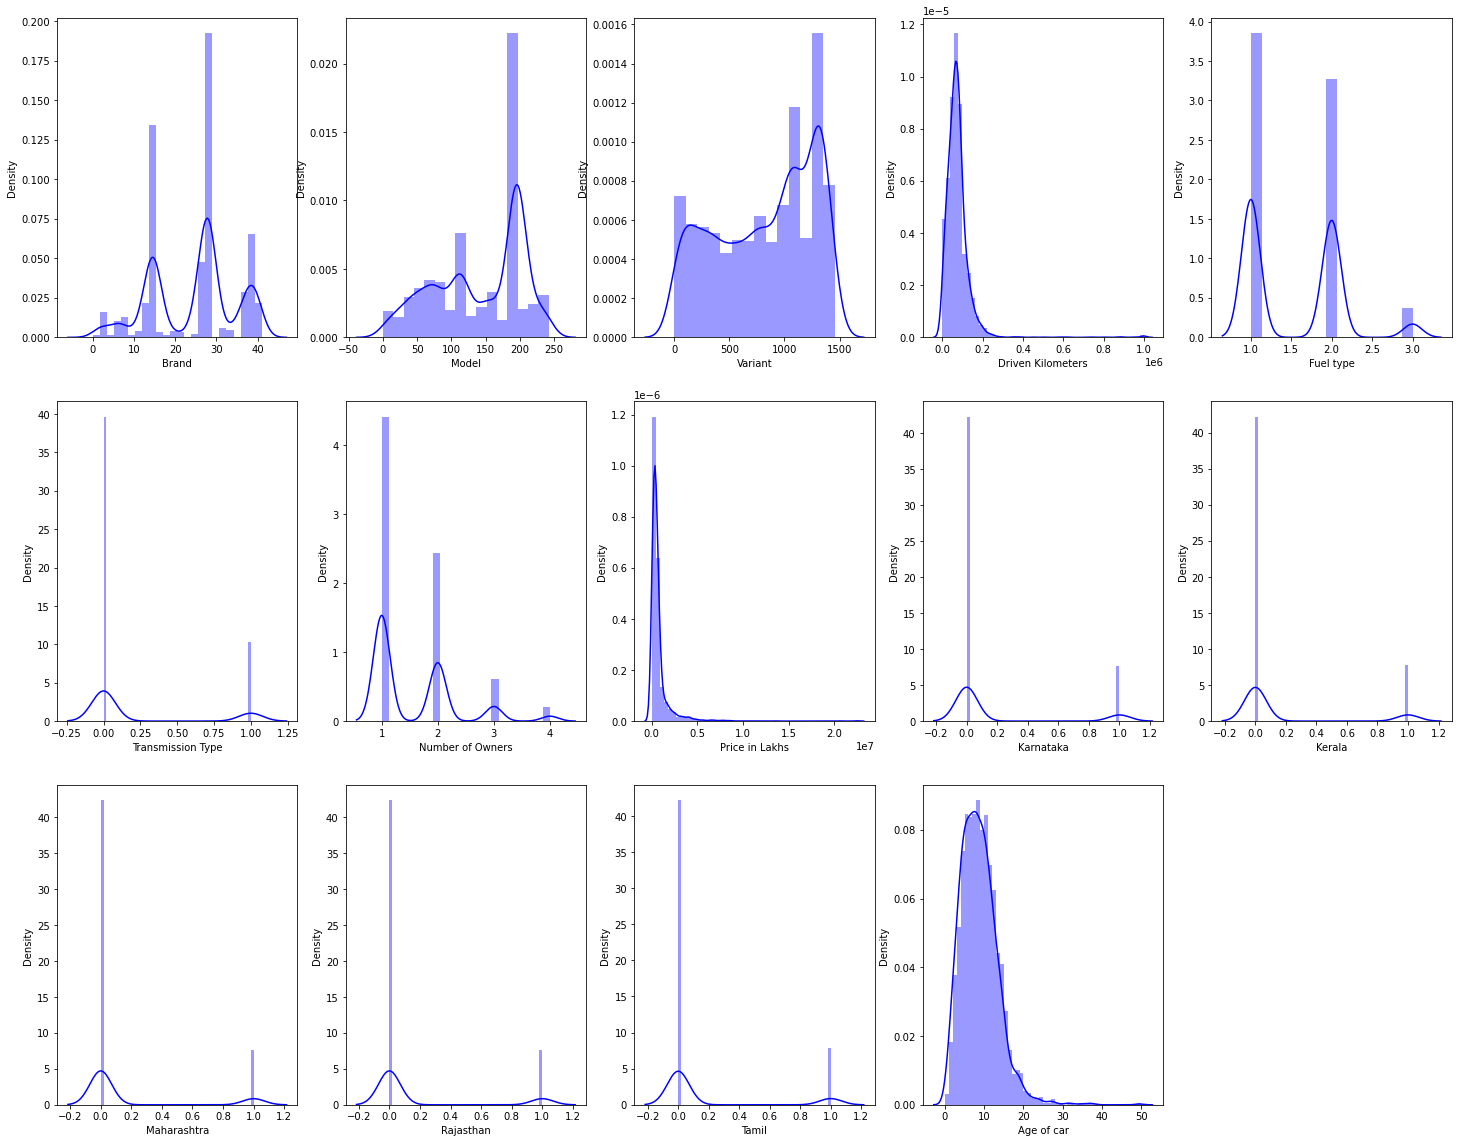

In [565]:
#checking the distribution of the data

plt.figure(figsize=(25,20))
pltno= 1
for i in df.columns:
    if pltno<15:
        ax = plt.subplot(3,5,pltno)
        sns.distplot(df[i],color='b')
        plt.xlabel(i, fontsize=10)
        pltno+=1
plt.show()

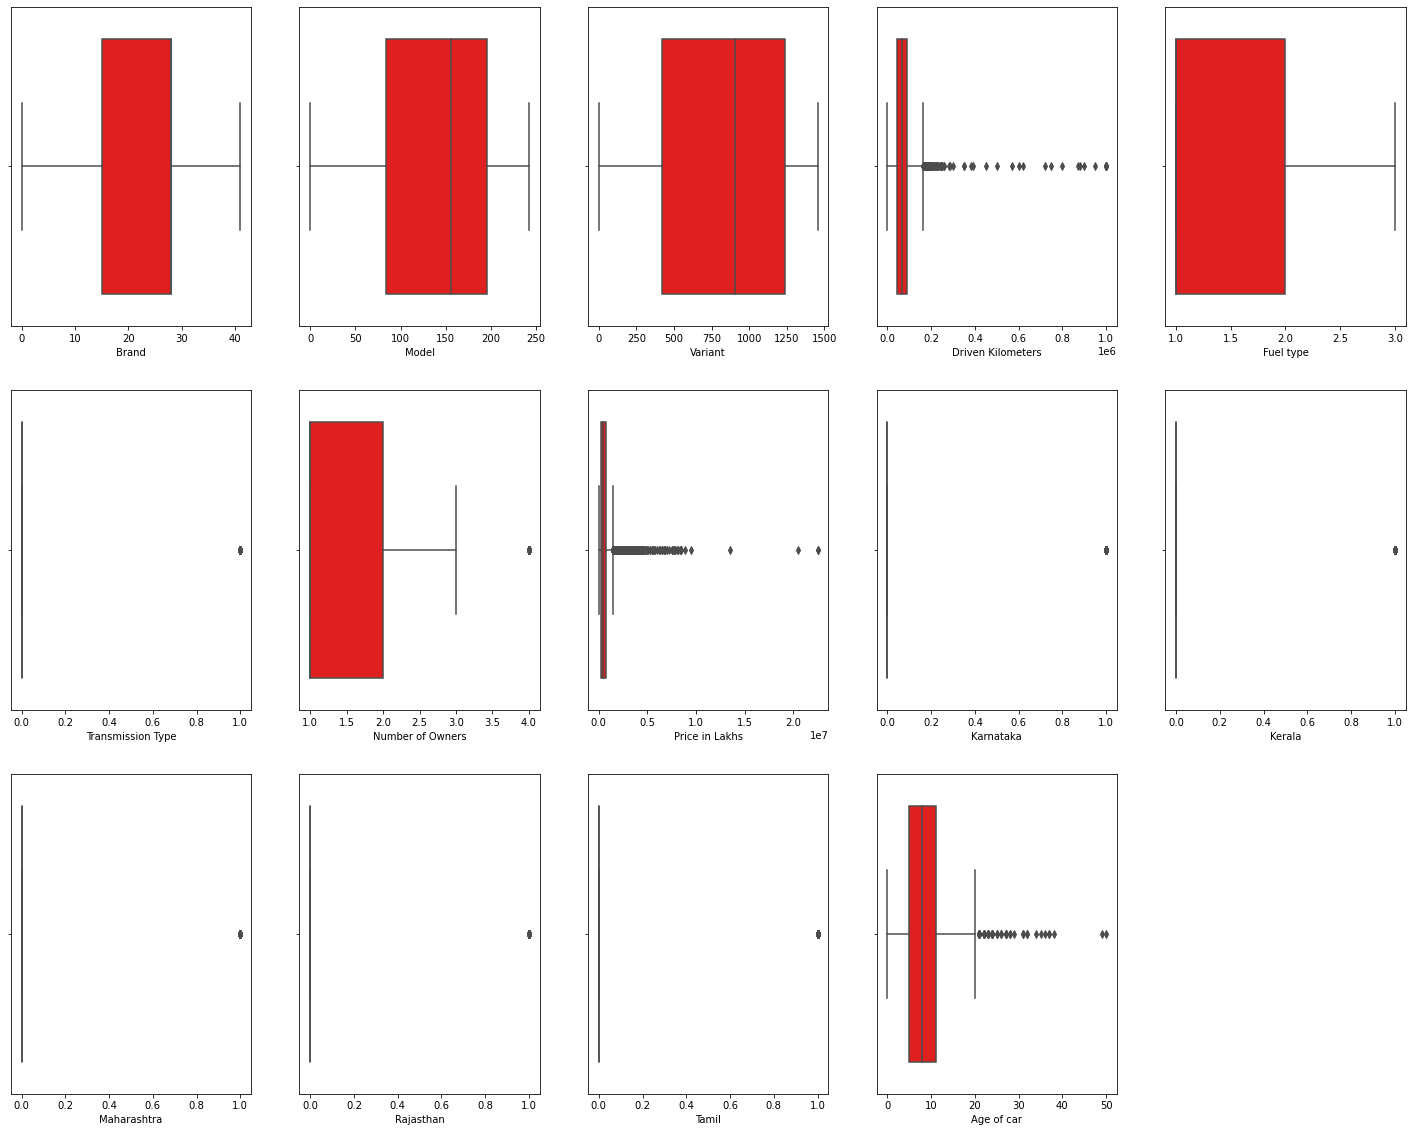

In [566]:
#checking the Outliers present in the dataset

plt.figure(figsize=(25,20))
pltno= 1
for i in df.columns:
    if pltno<15:
        ax = plt.subplot(3,5,pltno)
        sns.boxplot(df[i],color='r')
        plt.xlabel(i, fontsize=10)
        
        pltno+=1
plt.show()

### We have some outliers in Price, Age of Car, Driven kms, columns. Let us remove the outliers.

In [568]:

from scipy.stats import zscore

print("Before Outlier removal",df.shape)
z_score = zscore(df[['Age of car','Driven Kilometers','Price in Lakhs']])
abs_zsc = np.abs(z_score)

df = df[(abs_zsc<2.5).all(axis=1)]

print("After Outlier removal",df.shape)

Before Outlier removal (3195, 14)
After Outlier removal (3027, 14)


### We see there are some more outliers in Kms and Price value hence we will work on these 2 attributes

In [573]:
print("Before Outlier removal",df.shape)
z_score = zscore(df[['Driven Kilometers','Price in Lakhs']])
abs_zsc = np.abs(z_score)

df = df[(abs_zsc<2.5).all(axis=1)]

print("After Outlier removal",df.shape)

Before Outlier removal (3027, 14)
After Outlier removal (2827, 14)


### checking the Outliers present in the dataset

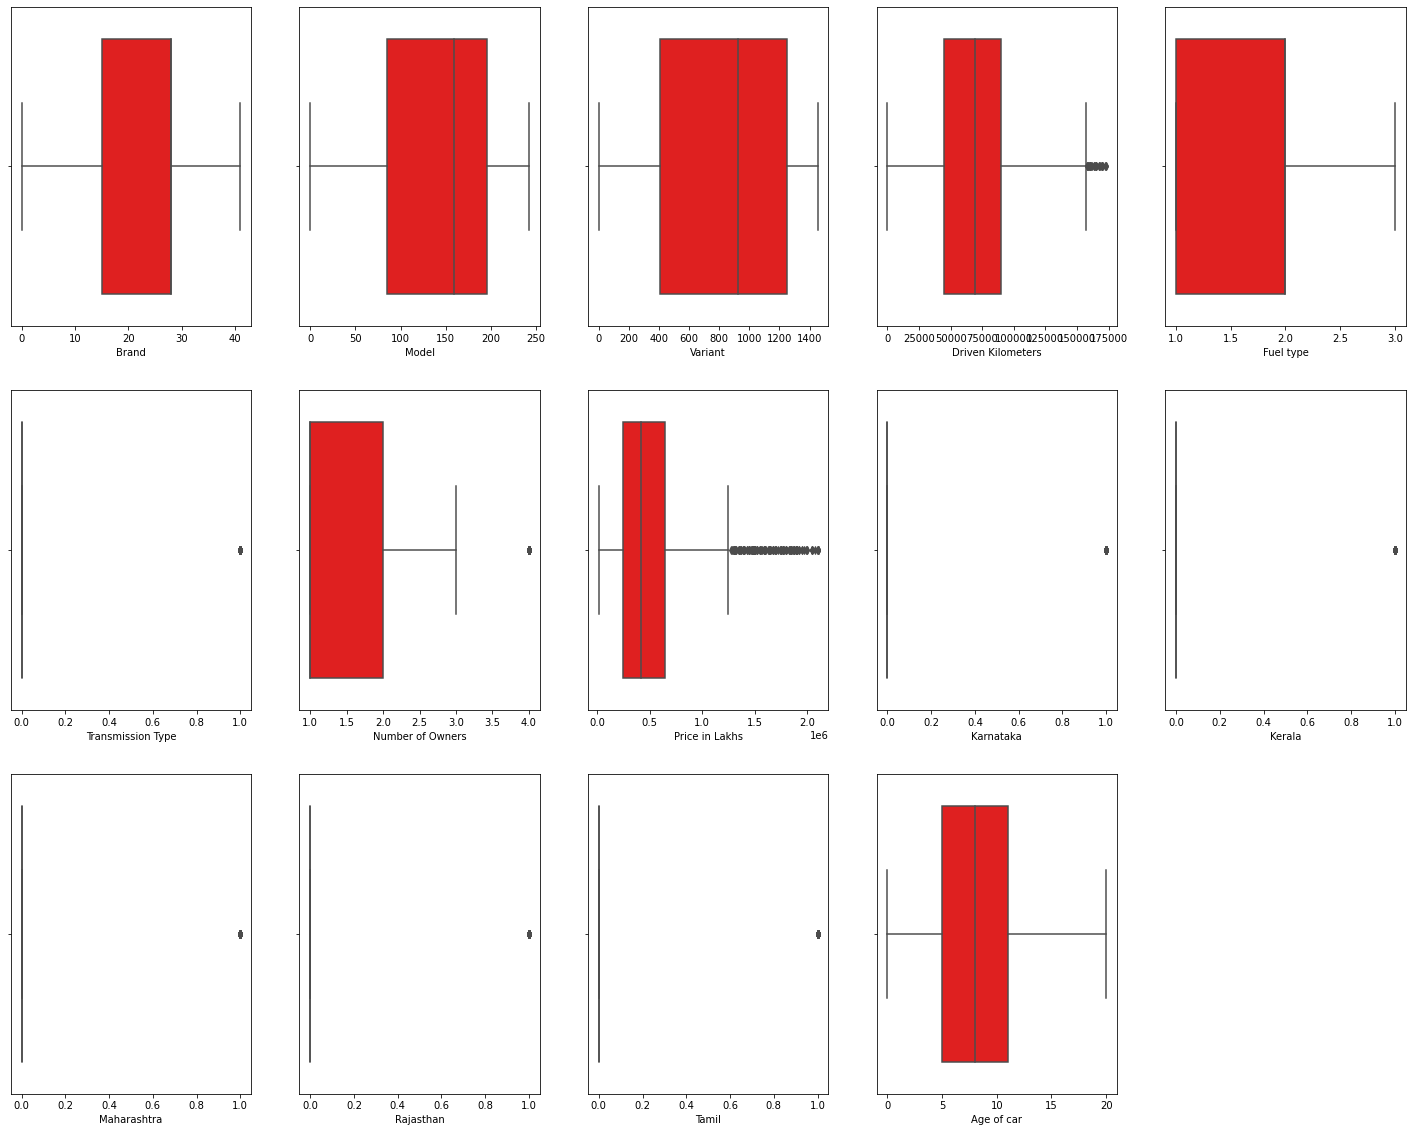

In [574]:


plt.figure(figsize=(25,20))
pltno= 1
for i in df.columns:
    if pltno<15:
        ax = plt.subplot(3,5,pltno)
        sns.boxplot(df[i],color='r')
        plt.xlabel(i, fontsize=10)
        
        pltno+=1
plt.show()

## We see there is significant reduction in outliers for Price, Kms driven and age of the car attributes.

## Checking the correlation between the attributes using Heatmaps

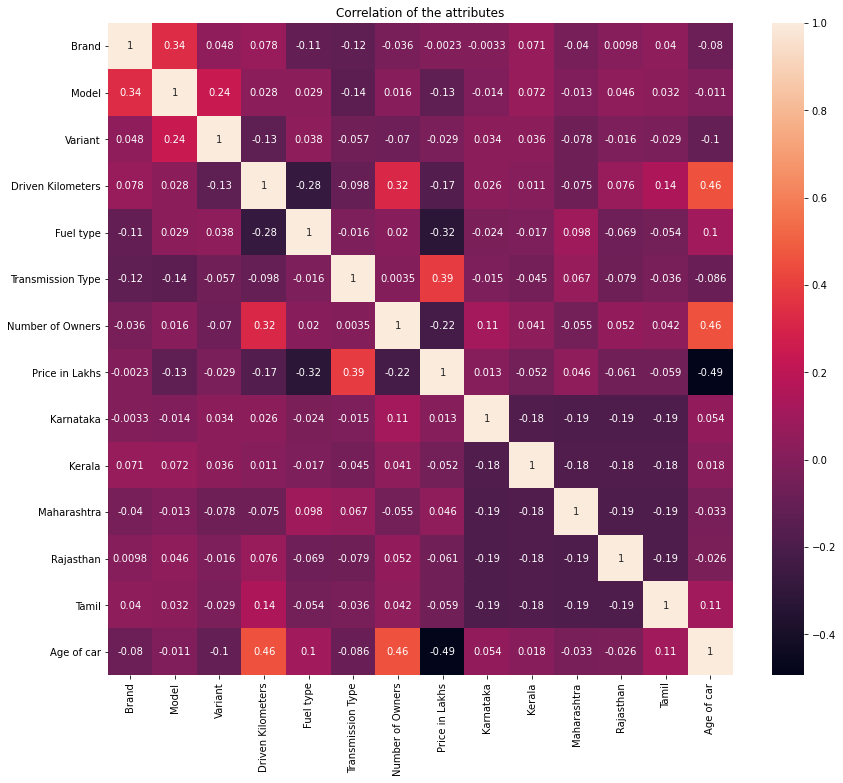

In [575]:
corr = df.corr()
plt.figure(figsize=(14,12), facecolor='white')
sns.heatmap(corr, annot=True)
plt.title('Correlation of the attributes')
plt.show()

In [578]:
df.skew()

Brand               -0.191676
Model               -0.453903
Variant             -0.354481
Driven Kilometers    0.382811
Fuel type            0.507609
Transmission Type    1.886057
Number of Owners     1.318304
Price in Lakhs       1.709070
Karnataka            1.886057
Kerala               1.961627
Maharashtra          1.864195
Rajasthan            1.889736
Tamil                1.897124
Age of car           0.314580
dtype: float64

## As the skewness of the data is not much high, we can consider not to treat the skewness.


## Model Building

Let us seperate the independent ande target variables to proceed with building model

In [582]:
X = df.drop(['Price in Lakhs'], axis=1)
y = df["Price in Lakhs"]

## Standarization

In [584]:
scalar = StandardScaler() #Initializting 
X_scalar = scalar.fit_transform(X) #fitting our data into Standard scalar  
X.head() #Priting top 5 rows of our data

,Brand,Model,Variant,Driven Kilometers,Fuel type,Transmission Type,Number of Owners,Karnataka,Kerala,Maharashtra,Rajasthan,Tamil,Age of car
0,28,196,1287,80000,1,0,1,1,0,0,0,0,15
1,28,196,1072,90000,3,0,2,0,0,0,1,0,5
2,15,62,195,33000,2,1,1,0,0,1,0,0,5
3,14,51,1280,24546,2,1,1,0,0,0,0,0,5
4,38,142,587,26000,2,0,2,0,1,0,0,0,7


### let us check if any components from the attributes can be reduced using PCA

In [585]:
pca = PCA()
pca.fit_transform(X_scalar)

array([[ 0.89939624, -1.01805681,  1.00597168, ..., -0.81695359,
         1.33146403, -0.3513053 ],
       [-0.10637454, -1.00868251,  0.25302338, ..., -0.34362316,
        -1.80325035, -0.12886463],
       [-2.19071548,  3.16322875, -0.23905157, ..., -0.05013785,
        -0.20052314, -0.48590362],
       ...,
       [-0.48861239, -0.14694564,  1.00366447, ..., -0.71175253,
         0.060831  , -0.23893751],
       [ 4.0783261 , -0.88040494,  2.59676782, ...,  0.20941516,
        -0.35848807,  0.16425064],
       [-1.71118524, -1.2119641 ,  0.53907318, ..., -0.08233492,
        -0.3158453 ,  0.88881255]])

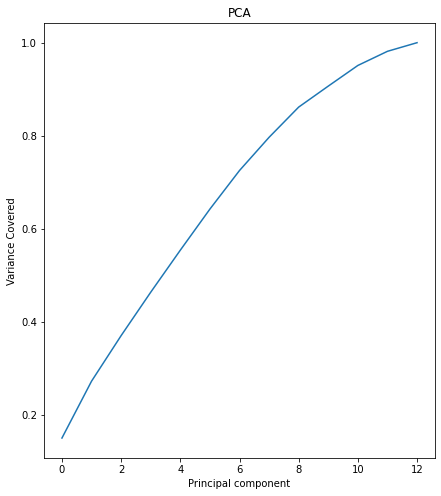

In [586]:
plt.figure(figsize=(7,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal component")
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

### As the variance of the data is getting added until the last attribute, let us not remove any of the attributes

Let us split the data into train and testing datasets

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X_scalar, y,random_state=56, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2120, 13), (707, 13), (2120,), (707,))

## 1. Linear Regression

*******************Results********************
The r2 score is: 0.43835413404474266
The mean absolute error 192739.51837482193
The mean squared error 76171378825.04317
root mean square error 275991.62817926775
The cross validation score 0.43868462254746554

*****************XXXXXXXXXXX********************


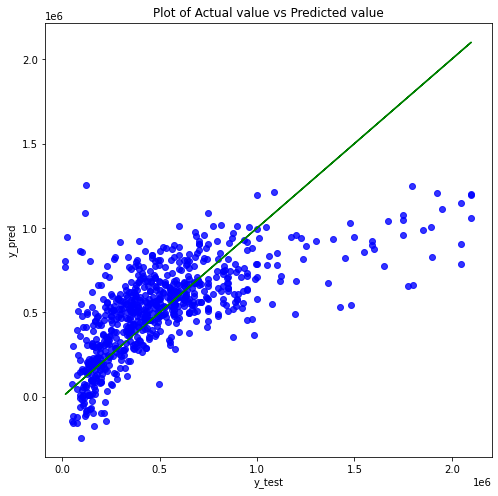

In [597]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. Random Forest

*******************Results********************
The r2 score is: 0.7351273554993752
The mean absolute error 114557.81992880715
The mean squared error 35922483841.900734
root mean square error 189532.27651748588
The cross validation score 0.7356746700175796

*****************XXXXXXXXXXX********************


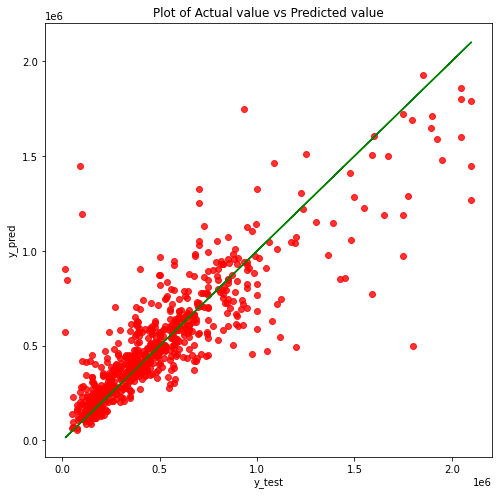

In [598]:
rand_for = RandomForestRegressor()
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(rand_for, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='red')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. Gradient Boosting

*******************Results********************
The r2 score is: 0.6954601984086395
The mean absolute error 133693.01050012634
The mean squared error 41302211946.071686
root mean square error 203229.45639368249
The cross validation score 0.7016731009115544

*****************XXXXXXXXXXX********************


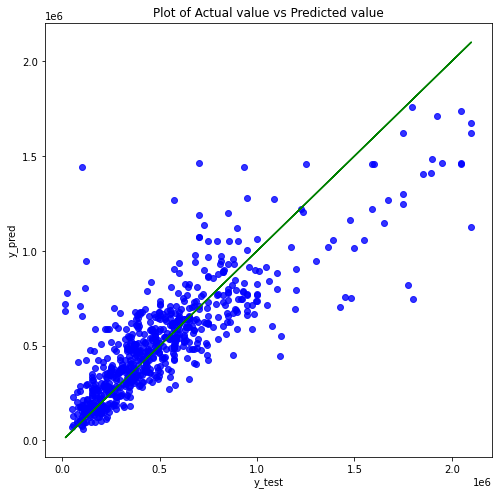

In [600]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. XG Boosting

*******************Results********************
The r2 score is: 0.7833870797674245
The mean absolute error 105724.58160029173
The mean squared error 29377416990.991955
root mean square error 171398.41595240007
The cross validation score 0.7834556188021103

*****************XXXXXXXXXXX********************


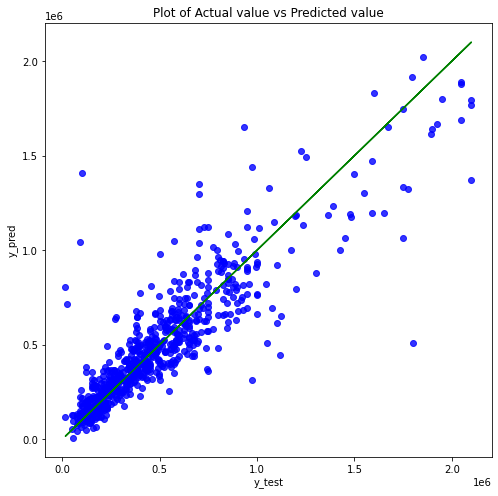

In [602]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(xgbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5. Decision Tree

*******************Results********************
The r2 score is: 0.5428983792106883
The mean absolute error 145361.69236209337
The mean squared error 61992908395.15877
root mean square error 248983.75126734428
The cross validation score 0.5522563446347799

*****************XXXXXXXXXXX********************


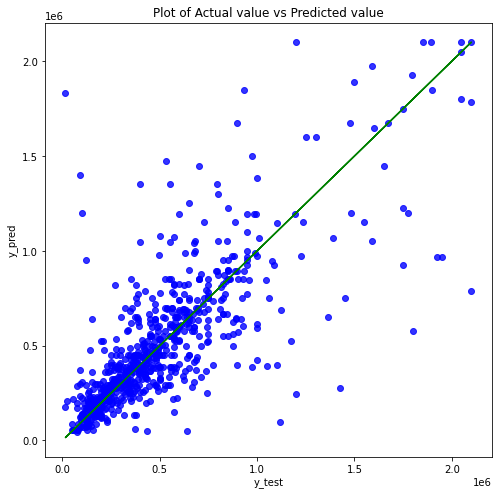

In [604]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(dec_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

 We see that random forest and XG boosting models have performed well and given highest r2scores.
 ### We are choosing XGB regressor for further tuning the parameters to increase the accuracy

## Hyper parameter tuning

In [613]:
xgbr = XGBRegressor()

param = {'n_estimators' : [100, 200, 300],
         'learning_rate':np.arange(0.01,0.1,0.01),
         'n_jobs' : [-2, -1, 1],
         'random_state' : [42, 251, 340]}

grid_CV = GridSearchCV(estimator=xgbr, param_grid=param)
grid_CV.fit(X_train, y_train)
grid_CV.best_params_

{'learning_rate': 0.09, 'n_estimators': 300, 'n_jobs': -2, 'random_state': 42}

*******************Results********************
The r2 score is: 0.7911013114441507
The mean absolute error 102050.0306270443
The mean squared error 28331199616.289738
root mean square error 168318.7441026392
The cross validation score 0.7883758629971414

*****************XXXXXXXXXXX********************


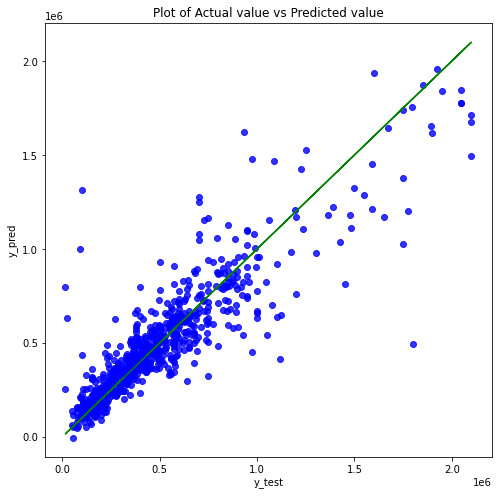

In [614]:
xgbr = XGBRegressor(learning_rate=0.09,n_estimators=300,n_jobs=-2,random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(xgbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### We see that there is slight increase in the r2score of model performance, Hence we are saving this model as final Model

## Saving the Best Model

In [ ]:
import pickle

file = open('Car Price Prediction Project.pkl', 'wb')

pickle.dump('xgbr',file)